### Employee Health Expenditure Analysis

#### A Company is having its offices across all locations of India. These locations are categorized with respect to zones.  The company has decided to give medical expenditure benefits to their employees.  The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents, age, bmi, smoking and alcoholic habits.

##### Dataset details

<b> id: </b> Employee id - unique <br>
<b> age: </b> age of primary beneficiary <br>
<b> sex: </b> Gender data - female, male <br>
<b> bmi: </b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>
<b> dependent: </b> Number of children other family members who are not earning and dependent on employee. <br>
<b> alcohol: </b> Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely <br>
<b> smoker: </b> Smoking habit. <br>
<b> zone: </b> The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest. <br>
<b> expenditure: </b> Individual medical expenditure by employees during year 2019 <br>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
df=pd.read_csv("emp_health.csv")
df.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [3]:
# Checking datatypes of the features
df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [4]:
# Checking for null values
df.isnull().sum()

id             0
age            0
sex            0
bmi            0
dependent      0
alcohol        0
smoke          0
zone           0
expenditure    0
dtype: int64

In [5]:
# Checking for duplicate observations
df.duplicated().sum()

0

In [9]:
# Checking statistical properties of the data
df.describe(include="all")

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10227,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


###### Q. How many employees above 50 age smoke, what is their average expenditure on health management?

In [13]:
df[(df.age>50)&(df.smoke=="yes")]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [16]:
# Finding average expenditure on health management
round(df[(df.age>50)&(df.smoke=="yes")].expenditure.mean(),2)

38820.22

<b> Takeaway: </b>
1. There are 64 employees above the age of 50, who smoke.
2. Their average expenditure on health management is 38,820/-

###### Q. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees

In [28]:
total_female=df.sex.value_counts()["female"]
fem_nondaily_alc=df[(df.sex=="female")&(df.alcohol!="daily")].shape[0]

In [31]:
print("Number of female employees who did not consume alcohol daily:",fem_nondaily_alc)
print("Total number of female employees:",total_female)
print("Proportion between them:",round(fem_nondaily_alc/total_female,2))

Number of female employees who did not consume alcohol daily: 453
Total number of female employees: 662
Proportion between them: 0.68


###### Q. Display zone wise average expenditure of employees on health

In [37]:
df.groupby("zone")[["expenditure"]].mean().sort_values("expenditure",ascending=False)

,expenditure
zone,
south,14715.689519
southeast,14452.949680
north,14102.583403
east,13774.679941
northeast,13694.721724
southwest,12717.083869
west,12182.998872
northwest,12151.702619


<b> Takeaway: </b>
1. 'South' zone has the highest average health expenditure across the zones, followed by 'Southeast'
2. Across the zones, the Western zones, 'Northwest', 'West', 'Southwest', have the least average health expenditure

###### Q. What is the minimum expenditure done by any employee in organization

In [42]:
df[df.expenditure==df.expenditure.min()]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


###### Q. What is average expenditure of employees who have 2 or lesser dependents

In [44]:
# Employees with 2 or lesser dependents
df[df.dependent<=2].head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160


In [46]:
# Their average health expenditure
round(df[df.dependent<=2].expenditure.mean(),2)

13040.97

###### Q. How many employees are below age of 20 years. What is their average BMI

In [51]:
# Employees below the age of 20
df[df.age<20]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
22,i10034,18,male,34.100,0,daily,no,south,1137.01100
31,i10043,18,female,26.315,0,daily,no,north,2198.18985
...,...,...,...,...,...,...,...,...,...
1315,i11327,18,male,28.310,1,weekend,no,east,11272.33139
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700
1317,i11329,18,male,53.130,0,party,no,southeast,1163.46270
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080


In [52]:
# Sex ratio
df[df.age<20].sex.value_counts()

male      71
female    66
Name: sex, dtype: int64

In [50]:
# Their average health expenditure
round(df[df.age<20].bmi.mean(),2)

29.97

<b> Takeaway: </b>
1. There are 137 employees below the age of 20. The majority, 71, are males
2. Their average BMI is 29.97

###### Q. Create a dataframe "non_smoker" for all non-smoker male employees

In [59]:
non_smoker=df[(df.sex=="male")&(df.smoke=="no")]
non_smoker.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070


###### Q. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [58]:
non_alcoholic=df[(df.sex=="male")&(df.alcohol=="no")]
non_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


###### Q. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [83]:
non_smoking_alcoholic=non_smoker.merge(non_alcoholic,on=["id","alcohol","smoke"],how="inner",suffixes=[" "," "])
non_smoking_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,age,sex,bmi,dependent,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500,56,male,40.300,0,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175,37,male,28.025,2,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215,23,male,17.385,1,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000,26,male,20.800,0,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785,40,male,26.315,1,northwest,6389.37785


In [84]:
# Dropping duplicate columns
non_smoking_alcoholic=non_smoking_alcoholic.T.drop_duplicates().T
non_smoking_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,zone,expenditure
0,i10030,56,male,40.3,0,no,southwest,10602.385
1,i10036,37,male,28.025,2,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,northwest,2775.19215
3,i10049,26,male,20.8,0,no,southwest,2302.3
4,i10079,40,male,26.315,1,no,northwest,6389.37785


###### Q. What is the count for each zone with respect to number of dependent

In [87]:
pd.crosstab(df.zone,df.dependent)

dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


###### Q. Classify the employees into 3 categories: 
1. Category 1 : employees below 18.5 bmi - underweight
2. Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
3. Category 3 : employee with bmi over 24.9 - overweight

<b>What is the average expenditure of employees in each category.
Display the bar chart for the same</b>

In [92]:
# Creating a new feature with 3 different BMI-categories
def bmi_category(x):
    if x<=18.5:
        return "underweight"
    elif x<=24.9:
        return "fit"
    else:
        return "overweight"

df["bmi_category"]=df.bmi.apply(bmi_category)
df.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight


In [98]:
# Average health expenditure of employees in each category
df.groupby("bmi_category")[["expenditure"]].mean().round(2)

,expenditure
bmi_category,
fit,10404.90
overweight,13936.62
underweight,8657.62


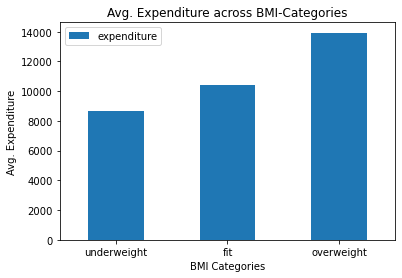

In [108]:
# Bar chart for the avg. expenditure of employees belonging to different BMI-categories
df.groupby("bmi_category")[["expenditure"]].mean().sort_values("expenditure").plot(kind="bar",rot=0,
            title="Avg. Expenditure across BMI-Categories",xlabel="BMI Categories",ylabel="Avg. Expenditure")
plt.show()

###### Q. Draw a bar chart to show zone wise average expenditure

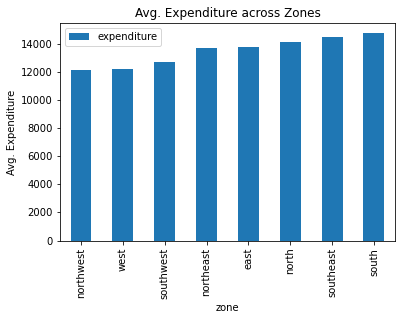

In [119]:
df.groupby("zone")[["expenditure"]].mean().sort_values("expenditure").plot(kind="bar",
            ylabel="Avg. Expenditure",title="Avg. Expenditure across Zones")
plt.show()

###### Q. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [130]:
# Average expenditure against smoking and alcoholic habits
pd.pivot_table(data=df,values="expenditure",index="alcohol",columns="smoke")

smoke,no,yes
alcohol,,
daily,8462.115558,31160.402608
no,8628.618182,32224.657378
party,8295.247250,31487.938163
rarely,5785.022944,31881.367379
weekend,8784.631185,33592.294629


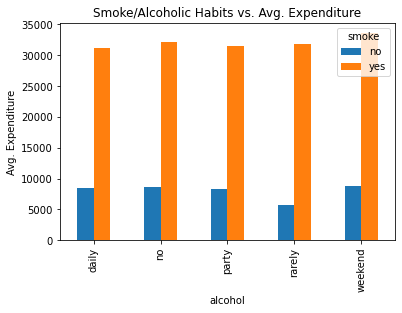

In [129]:
pd.pivot_table(data=df,values="expenditure",index="alcohol",columns="smoke").plot(kind="bar",
                    title="Smoke/Alcoholic Habits vs. Avg. Expenditure",ylabel="Avg. Expenditure")
plt.show()

<b> Takeaway: </b>
1. The average expenditure of a non-smoker is significantly low compared to those who smoke

###### Q. Draw pie chart for alcohol consumption habits

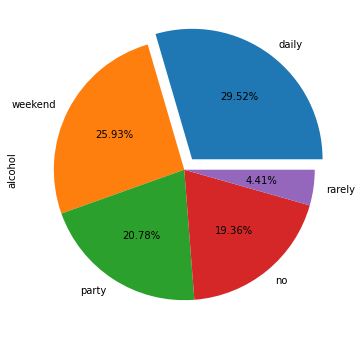

In [137]:
df.alcohol.value_counts().plot(kind="pie",figsize=(6,6),autopct="%1.2f%%",explode=[0.1,0,0,0,0])
plt.show()

###### Q. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

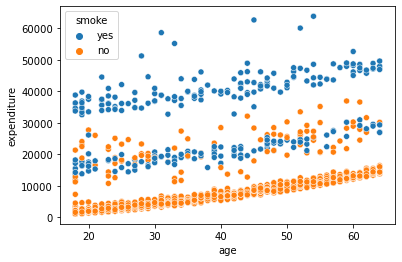

In [140]:
sns.scatterplot(data=df,x="age",y="expenditure",hue="smoke")
plt.show()

<b> Takeaway: </b>
1. It can be observed that as age increases the health expenditure increases
2. It is evident that, despite the age, an employee who smokes has got a significantly higher expenditure

###### Q. Draw distribution plot of expenditure

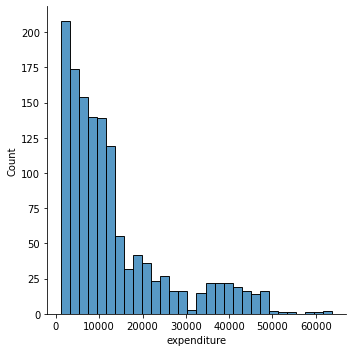

In [148]:
sns.displot(df.expenditure)
plt.show()

<b> Takeaway: </b>
1. The data is right skewed, denoting a lower median value than the mean value
2. Majority of the observations has an expenditure lower than 5,000/-

###### Q. Display the pairplot

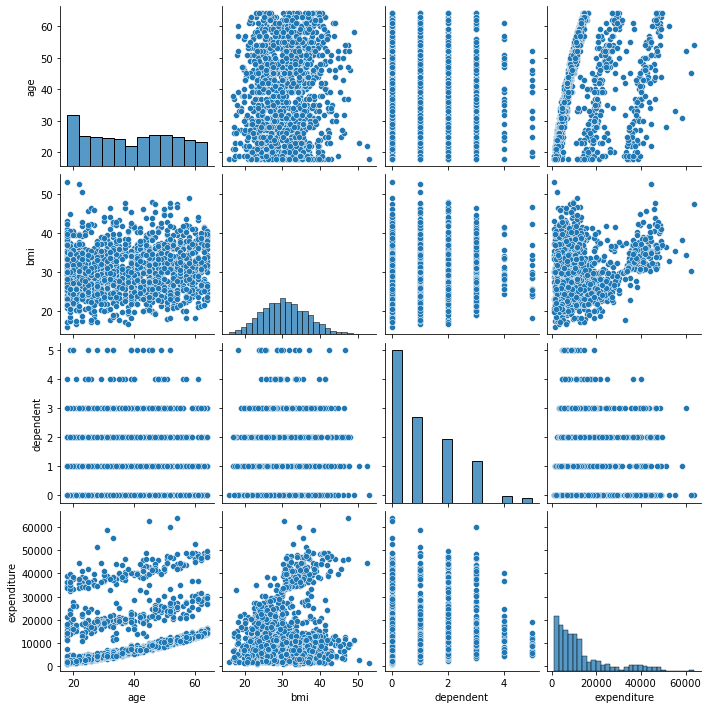

In [150]:
sns.pairplot(df);

<b> Takeaway: </b>
1. There is a positive correlation between the features age and expenditure
2. There is a slight positive relation between the features bmi and expenditure

###### Q. Display heatmap for the data

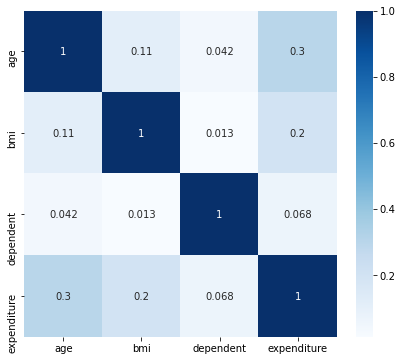

In [156]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),cmap="Blues",annot=True);

<b> Takeaway: </b>
1. There is a positive correlation between the features age and expenditure
2. There is a slight positive relation between the features bmi and expenditure